In [71]:
from madore_wave_extraction import detrend_madore, extract_wave
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
from scipy.signal import hilbert

In [72]:
subject = "A2"

path = os.path.join("C:", os.sep, "data", "Formatted_datasets", subject)

with open(os.path.join(path, "surrogates.pickle"), "rb") as file:
    surrogates = pickle.load(file)

with open(os.path.join(path, "splits.pickle"), "rb") as file:
    splits = pickle.load(file)

with open(os.path.join(path, "mr2us_new.pickle"), "rb") as file:
    mr2us = pickle.load(file)["mr2us"]

In [73]:
sb = mr2us[splits["Shallow Breathing"]["start"]-1], mr2us[splits["Shallow Breathing"]["end"]]
rb = mr2us[splits["Regular Breathing"]["start"]-1], mr2us[splits["Regular Breathing"]["end"]]
db = mr2us[splits["Deep Breathing"]["start"]-1], mr2us[splits["Deep Breathing"]["end"]]
dbh = mr2us[splits["Deep BH"]["start"]-1], mr2us[splits["Deep BH"]["end"]]
hbh = mr2us[splits["Half Exhale BH"]["start"]-1], mr2us[splits["Half Exhale BH"]["end"]]
febh = mr2us[splits["Full Exhale BH"]["start"]-1], mr2us[splits["Full Exhale BH"]["end"]]

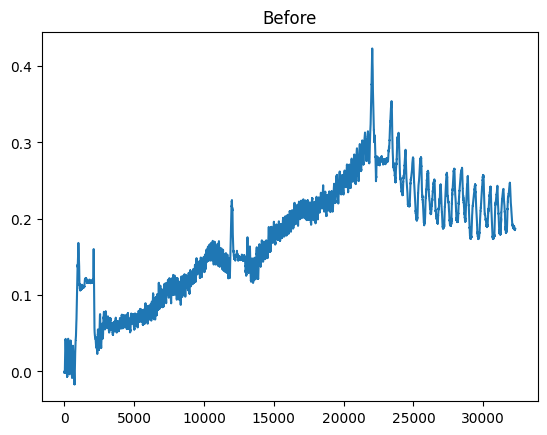

In [74]:
us = np.array(surrogates["us"]).T
roi = (0, 1000)
hilbert_us = hilbert(us, axis=0)
hilbert_phase = np.angle(hilbert_us)
hilbert_magnitude = np.abs(hilbert_us)
z = extract_wave(hilbert_phase, roi)

plt.figure()
plt.title("Before")
plt.plot(z)

In [75]:
trends = []
for i, w in enumerate([dbh, sb, hbh, rb, febh, db]):
    z_w = z[w[0]:w[1]]
    z_trend = detrend_madore(z_w, hilbert_magnitude[:, w[0]:w[1]])
    trends.append(z_trend)

100%|██████████| 8570/8570 [01:03<00:00, 135.55it/s]


In [77]:
final_trend = trends[0]
for i in range(1, len(trends)):
    val = final_trend[-1]
    new_trend = trends[i] + val
    final_trend = np.concatenate([final_trend, new_trend])

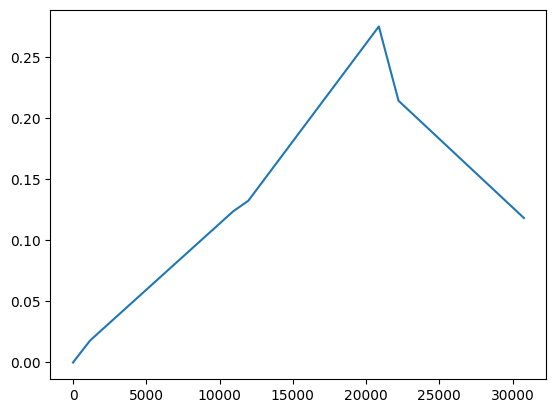

In [78]:
plt.plot(final_trend)

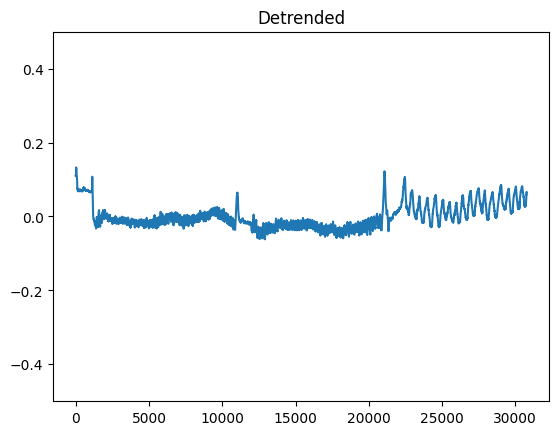

In [86]:

detrended = z[dbh[0]:db[1]] - final_trend

plt.figure()
plt.title("Detrended")
plt.plot((detrended - detrended.mean()))
plt.ylim([-.5, .5])

plt.show()

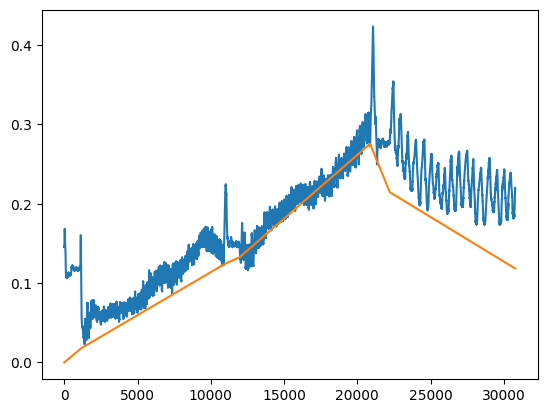

In [80]:
plt.plot(z[dbh[0]:db[1]])
plt.plot(final_trend)

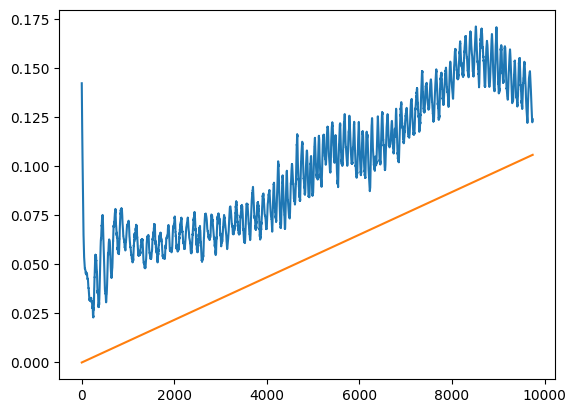

In [81]:
plt.plot(z[sb[0]: sb[1]])
plt.plot(trends[1])